In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [5]:
# Pengaturan visualisasi
sns.set_style("whitegrid")
plt.style.use("seaborn-v0_8-whitegrid")

In [9]:
# Masukkan dataset
try:
    df = pd.read_csv('/Healthcare-Diabetes.csv')
    print("Dataset berhasil dimuat.")
except FileNotFoundError:
    print("Error: File 'Healthcare-Diabetes.csv' tidak ditemukan. Mohon unggah file ke Google Colab.")

Dataset berhasil dimuat.


In [10]:
# Analisis struktural
print("\n--- Analisis Struktural Awal ---")
print(f"Dimensi data: {df.shape}")
print("\nInformasi tipe data dan nilai non-null:")
df.info()


--- Analisis Struktural Awal ---
Dimensi data: (2768, 10)

Informasi tipe data dan nilai non-null:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [11]:
# Ringkasan statistik awal
print("\n--- Ringkasan Statistik Awal ---")
print(df.describe().T)


--- Ringkasan Statistik Awal ---
                           count         mean         std     min      25%  \
Id                        2768.0  1384.500000  799.197097   1.000  692.750   
Pregnancies               2768.0     3.742775    3.323801   0.000    1.000   
Glucose                   2768.0   121.102601   32.036508   0.000   99.000   
BloodPressure             2768.0    69.134393   19.231438   0.000   62.000   
SkinThickness             2768.0    20.824422   16.059596   0.000    0.000   
Insulin                   2768.0    80.127890  112.301933   0.000    0.000   
BMI                       2768.0    32.137392    8.076127   0.000   27.300   
DiabetesPedigreeFunction  2768.0     0.471193    0.325669   0.078    0.244   
Age                       2768.0    33.132225   11.777230  21.000   24.000   
Outcome                   2768.0     0.343931    0.475104   0.000    0.000   

                               50%       75%      max  
Id                        1384.500  2076.250  2768.

/tmp/ipython-input-2197946200.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Outcome', palette='viridis')


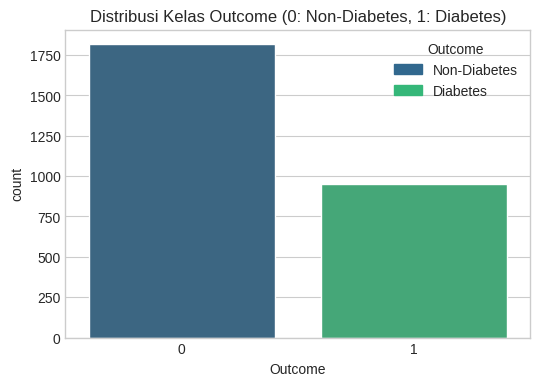

In [13]:
# Visualisasi distribusi 'Outcome'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Outcome', palette='viridis')
labels = ['Non-Diabetes', 'Diabetes']   # 0 → Non-Diabetes, 1 → Diabetes
handles = [plt.Rectangle((0,0),1,1, color=c) for c in sns.color_palette("viridis", 2)]
plt.legend(handles, labels, title="Outcome")
plt.title('Distribusi Kelas Outcome (0: Non-Diabetes, 1: Diabetes)')
plt.show()

In [24]:
print(df.head(10))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   2

In [25]:
print(df.tail())

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
2763            2       75             64             24       55  29.7   
2764            8      179             72             42      130  32.7   
2765            6       85             78              0        0  31.2   
2766            0      129            110             46      130  67.1   
2767            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
2763                     0.370   33        0  
2764                     0.719   36        1  
2765                     0.382   42        0  
2766                     0.319   26        1  
2767                     0.547   25        0  


In [27]:
# Mengganti nilai '0' yang tidak valid dengan median (strategi yang lebih kuat jika ada outlier, karena penggunaan mean mudah dipengaruhi outlier)
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_to_impute:
    median_val = df[col].median()
    df[col].replace(0, median_val, inplace=True)

print("\n--- Statistik Deskriptif Setelah Imputasi Median ---")
print(df.describe().T)


--- Statistik Deskriptif Setelah Imputasi Median ---
                           count        mean         std     min     25%  \
Pregnancies               2768.0    3.742775    3.323801   0.000   1.000   
Glucose                   2768.0  121.863439   30.503499  44.000  99.000   
BloodPressure             2768.0   72.385838   11.988549  24.000  64.000   
SkinThickness             2768.0   27.471821    9.470778   7.000  23.000   
Insulin                   2768.0   97.906069  100.516123  14.000  37.000   
BMI                       2768.0   32.591077    7.103578  18.200  27.575   
DiabetesPedigreeFunction  2768.0    0.471193    0.325669   0.078   0.244   
Age                       2768.0   33.132225   11.777230  21.000  24.000   
Outcome                   2768.0    0.343931    0.475104   0.000   0.000   

                              50%      75%     max  
Pregnancies                 3.000    6.000   17.00  
Glucose                   117.000  141.000  199.00  
BloodPressure             

/tmp/ipython-input-2140175166.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(0, median_val, inplace=True)



--- Visualisasi Distribusi dan Hubungan ---


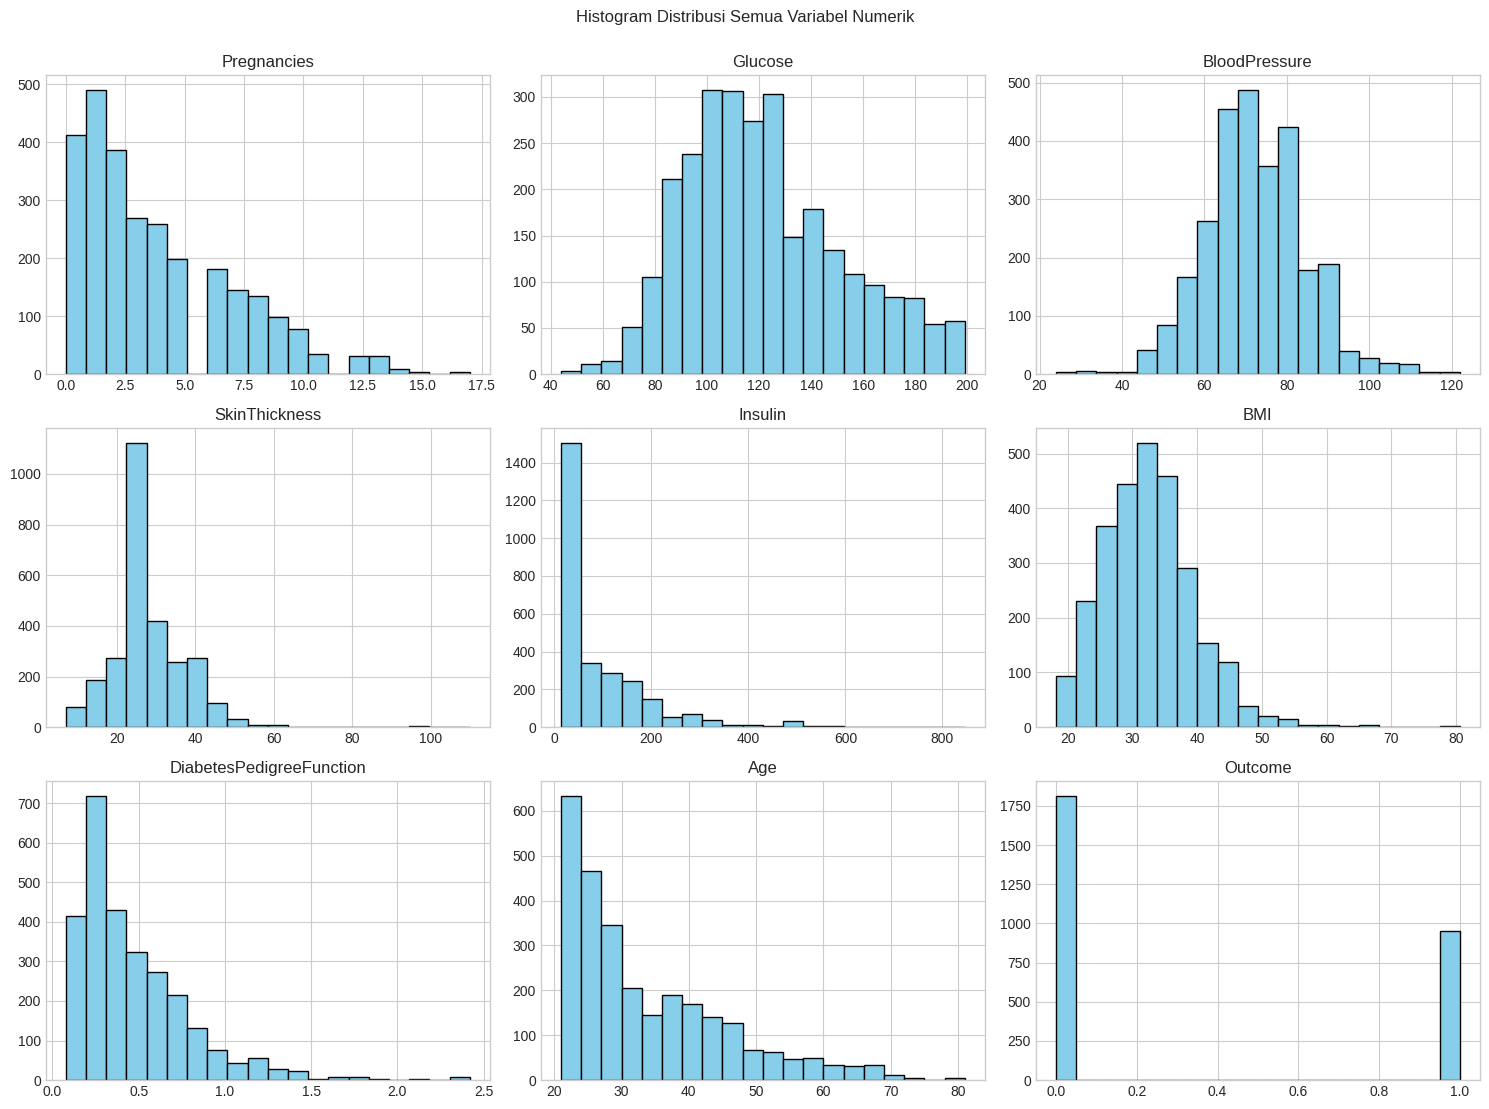

In [28]:
print("\n--- Visualisasi Distribusi dan Hubungan ---")

# Visualisasi distribusi variabel numerik
df.hist(figsize=(15, 12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histogram Distribusi Semua Variabel Numerik', y=0.95)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

/tmp/ipython-input-228093589.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, ax=axes[i], palette='viridis')
/tmp/ipython-input-228093589.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, ax=axes[i], palette='viridis')
/tmp/ipython-input-228093589.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, ax=axes[i], palette='viridis')
/tmp/ipython-input-228093589.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

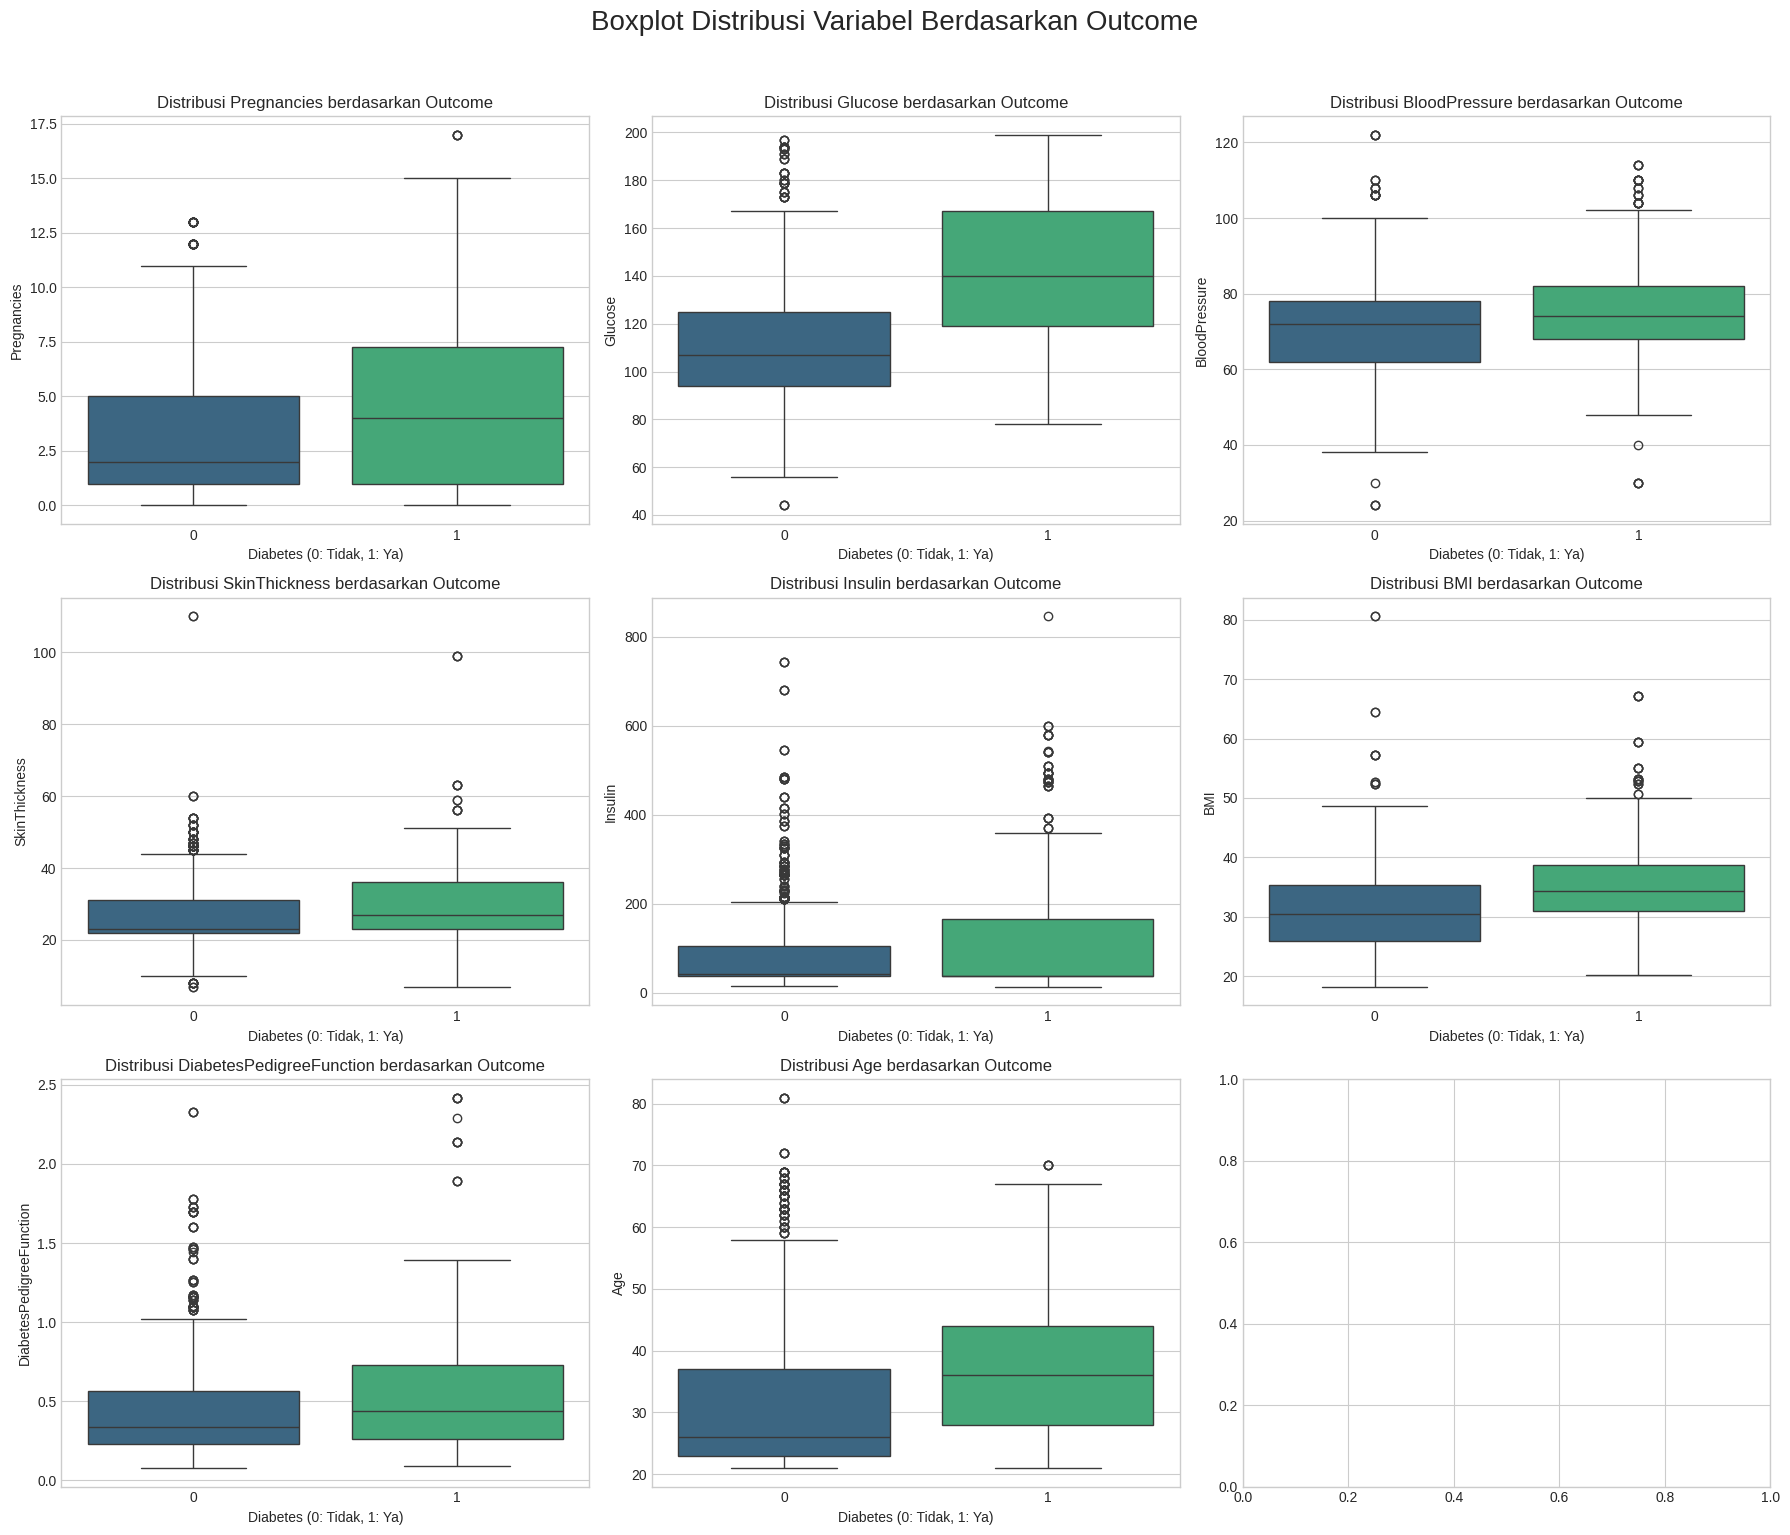

In [29]:
# Box Plot: Membandingkan distribusi antar kelompok 'Outcome'
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(df.drop('Outcome', axis=1).columns):
    sns.boxplot(x='Outcome', y=col, data=df, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribusi {col} berdasarkan Outcome')
    axes[i].set_xlabel('Diabetes (0: Tidak, 1: Ya)')

plt.suptitle('Boxplot Distribusi Variabel Berdasarkan Outcome', y=1.02, fontsize=20)
plt.tight_layout()
plt.show()

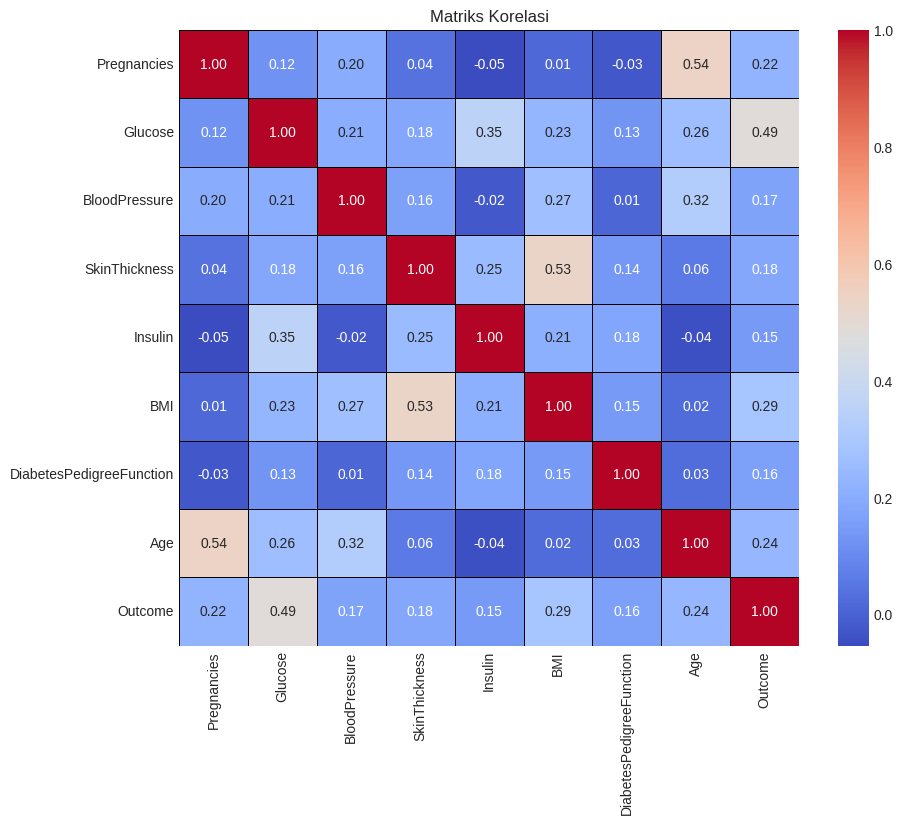

In [30]:
# Heatmap Korelasi
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=0.5, linecolor='black')
plt.title('Matriks Korelasi')
plt.show()

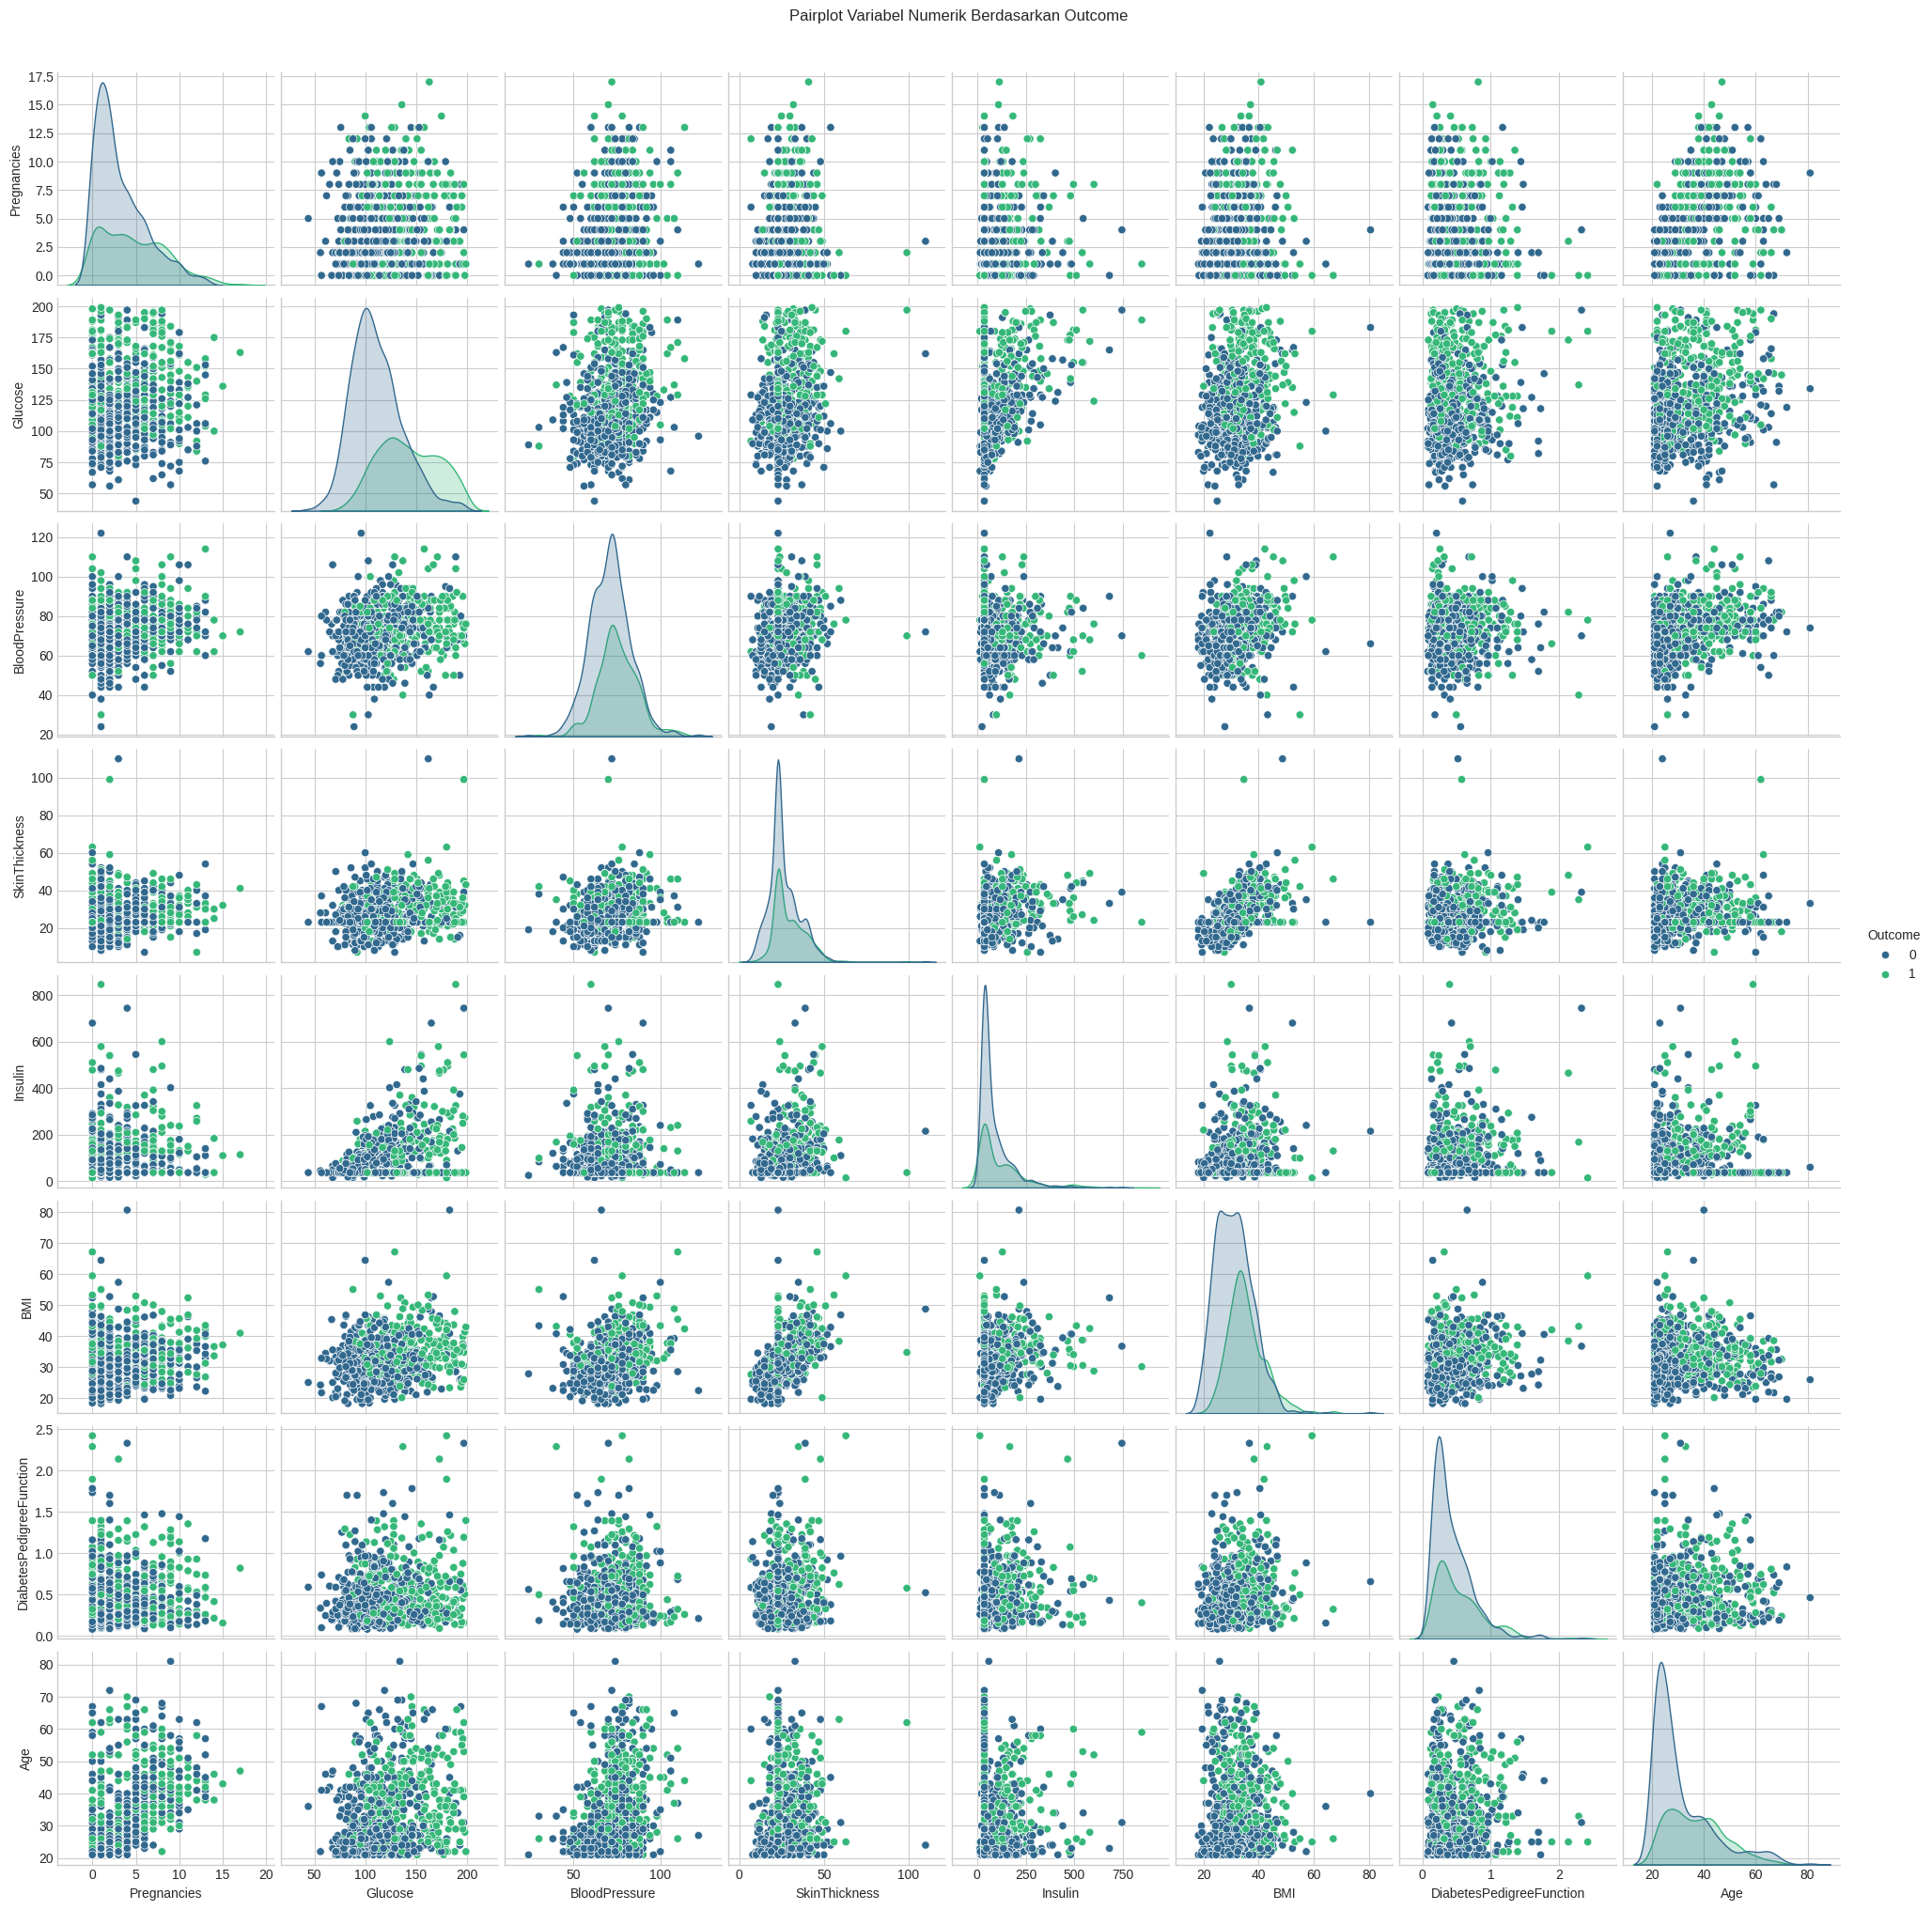

In [31]:
# Pairplot untuk melihat hubungan antar semua variabel
sns.pairplot(df, hue='Outcome', diag_kind='kde', palette='viridis')
plt.suptitle('Pairplot Variabel Numerik Berdasarkan Outcome', y=1.02)
plt.show()

/tmp/ipython-input-2618393788.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y='Glucose', data=df, ax=axes[0, 0], palette='magma')
/tmp/ipython-input-2618393788.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y='BMI', data=df, ax=axes[0, 1], palette='magma')
/tmp/ipython-input-2618393788.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y='Age', data=df, ax=axes[1, 0], palette='magma')
/tmp/ipython-input-2618393788.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is d

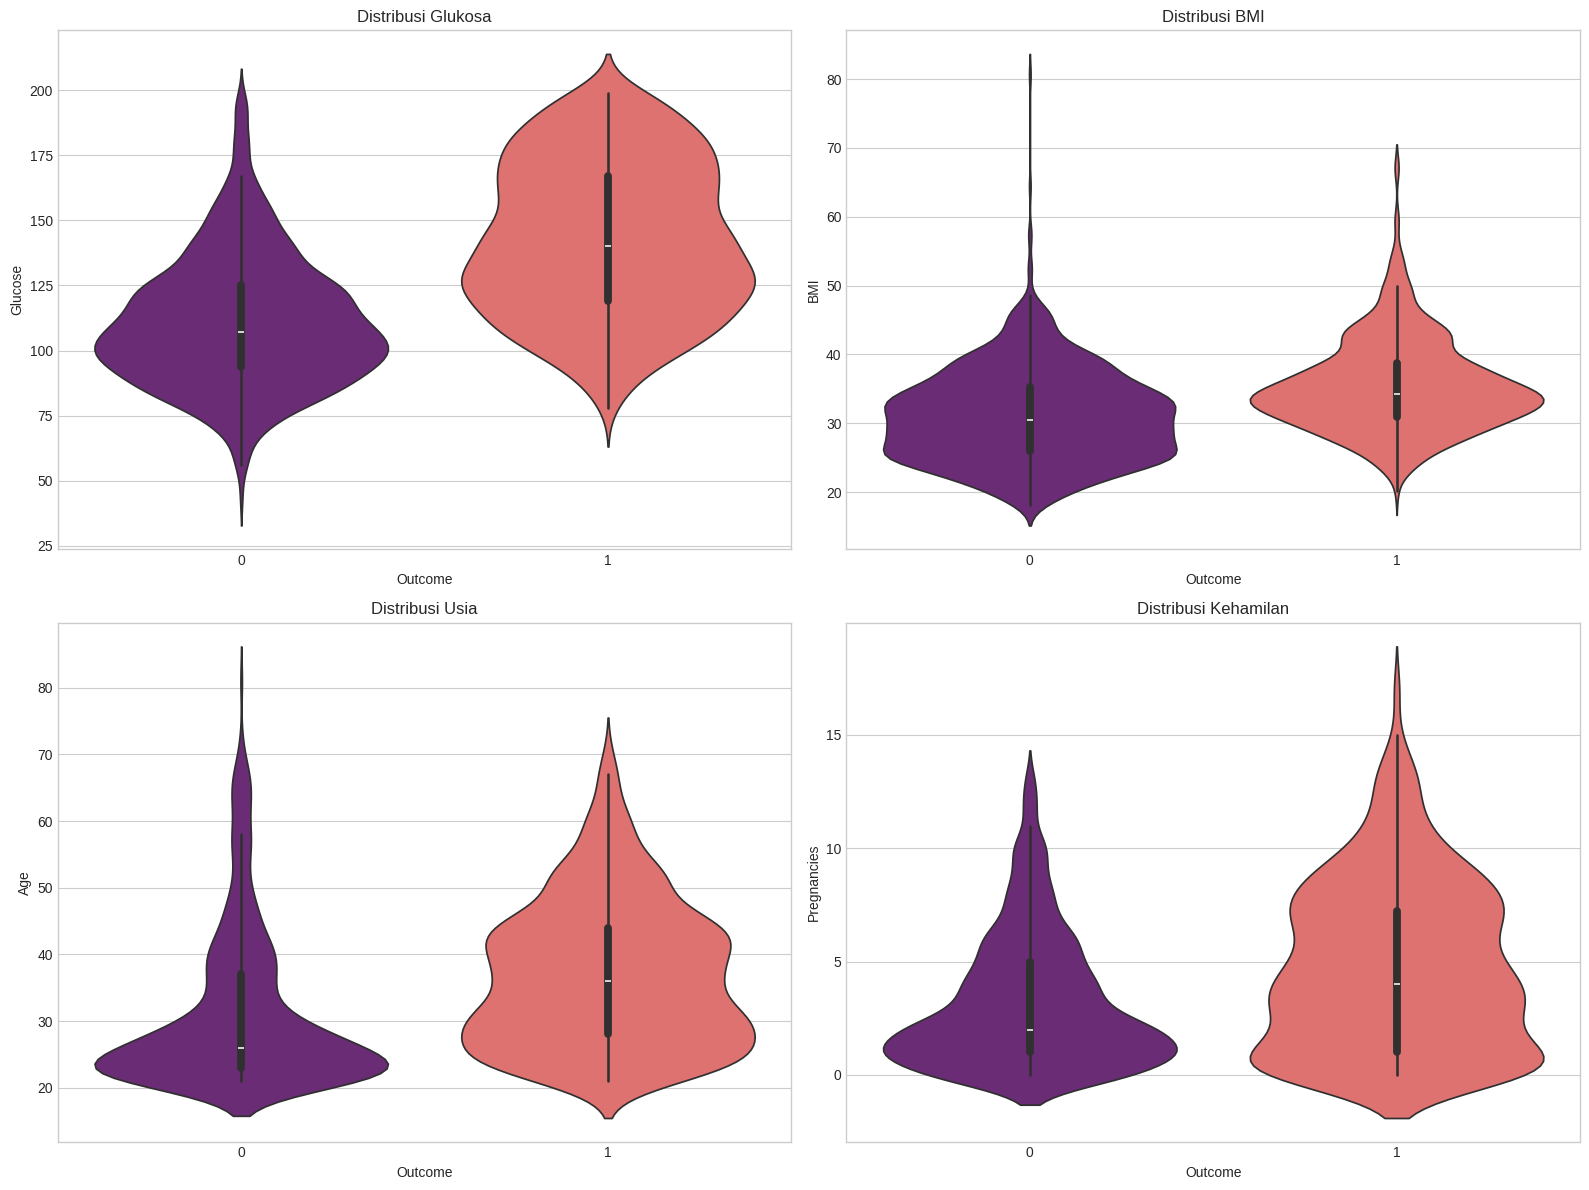

In [32]:
# Violin Plot untuk melihat distribusi dan kepadatan
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.violinplot(x='Outcome', y='Glucose', data=df, ax=axes[0, 0], palette='magma')
axes[0, 0].set_title('Distribusi Glukosa')
sns.violinplot(x='Outcome', y='BMI', data=df, ax=axes[0, 1], palette='magma')
axes[0, 1].set_title('Distribusi BMI')
sns.violinplot(x='Outcome', y='Age', data=df, ax=axes[1, 0], palette='magma')
axes[1, 0].set_title('Distribusi Usia')
sns.violinplot(x='Outcome', y='Pregnancies', data=df, ax=axes[1, 1], palette='magma')
axes[1, 1].set_title('Distribusi Kehamilan')

plt.tight_layout()
plt.show()


--- Melatih dan Mengevaluasi Model ---

--- Hasil Model Regresi Logistik ---
Akurasi: 0.7399
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       454
           1       0.66      0.51      0.57       238

    accuracy                           0.74       692
   macro avg       0.71      0.68      0.69       692
weighted avg       0.73      0.74      0.73       692

Matriks Kebingungan:


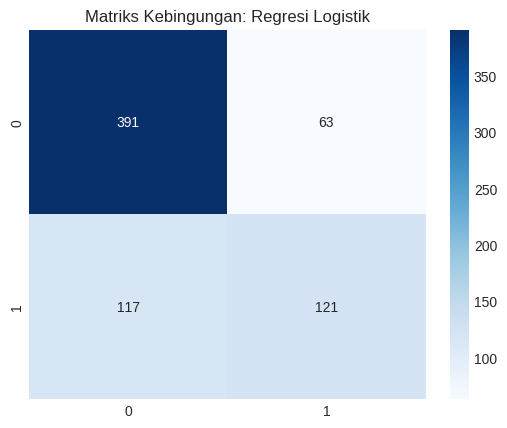

In [33]:
# Memisahkan fitur (X) dan target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Standarisasi data (Penting untuk model berbasis jarak seperti Regresi Logistik)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membagi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

print("\n--- Melatih dan Mengevaluasi Model ---")

# Model 1: Regresi Logistik
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("\n--- Hasil Model Regresi Logistik ---")
print(f"Akurasi: {accuracy_score(y_test, y_pred_logreg):.4f}")
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred_logreg))
print("Matriks Kebingungan:")
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title('Matriks Kebingungan: Regresi Logistik')
plt.show()


--- Hasil Model Random Forest ---
Akurasi: 0.9899
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       454
           1       0.98      0.99      0.99       238

    accuracy                           0.99       692
   macro avg       0.99      0.99      0.99       692
weighted avg       0.99      0.99      0.99       692

Matriks Kebingungan:


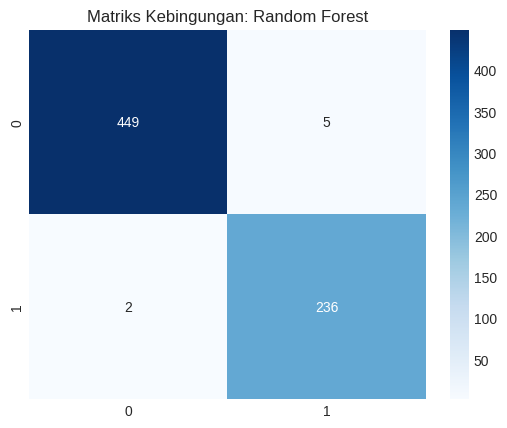

In [34]:
# Model 2: Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n--- Hasil Model Random Forest ---")
print(f"Akurasi: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred_rf))
print("Matriks Kebingungan:")
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Matriks Kebingungan: Random Forest')
plt.show()


--- Analisis Hasil dan Pentingnya Fitur ---


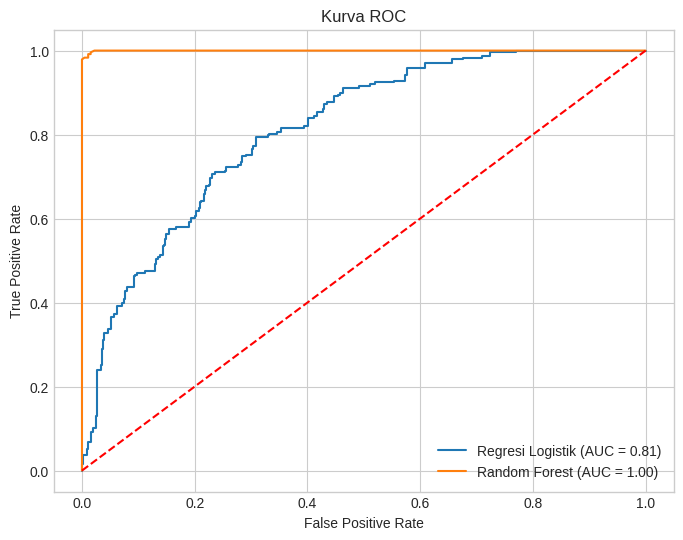


--- Pentingnya Fitur (Random Forest) ---
                    Feature  Importance
1                   Glucose    0.272994
5                       BMI    0.160863
7                       Age    0.131737
6  DiabetesPedigreeFunction    0.120339
2             BloodPressure    0.087570
0               Pregnancies    0.081903
4                   Insulin    0.075142
3             SkinThickness    0.069451


In [35]:
print("\n--- Analisis Hasil dan Pentingnya Fitur ---")

# Membandingkan kurva ROC untuk kedua model
y_pred_prob_logreg = logreg.predict_proba(X_test)[:, 1]
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_prob_logreg)
auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Regresi Logistik (AUC = {auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC')
plt.legend()
plt.show()

# Pentingnya fitur dari model Random Forest
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\n--- Pentingnya Fitur (Random Forest) ---")
print(feature_importance_rf)